<a href="https://colab.research.google.com/github/ujeongmin/ESAA/blob/main/ESAA_HW_5_17.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

(파이썬 딥러닝 텐서플로)
# PART 03. 케라스(Keras)



## 01. 딥러닝 준비
### 1-1 주요 용어
1-1-1 하이퍼 파라미터 : 머신러닝 모델을 훈련할 때 사용자가 직접 설정해주는 설정 값  
1-1-2 과소적합 vs. 과대적합 : 모델이 충분히 학습되지 않은 경우 vs. 지나치게 과하게 적합된 상태  
1-1-3 에포크(epoch) : 데이터셋을 전부 학습에 사용하는 1회의 훈련 루프가 1 epoch  
1-1-4 손실함수 : 예측 값과 정답 값의 차이 또는 오차



In [ ]:
# 손실함수
import tensorflow as tf

# 클래스
tf.keras.losses.BinaryCrossentropy()
# 함수
tf.keras.losses.binray_crossentropy

1-1-5 경사하강법 : 딥러닝 모델을 훈련할 때, 모델 내부의 가중치에 대한 미분 값을 구하고 목적 함수 값이 낮아지는 방향으로 차감하면서 결국 최소 함수 값을 갖도록 하는 방법

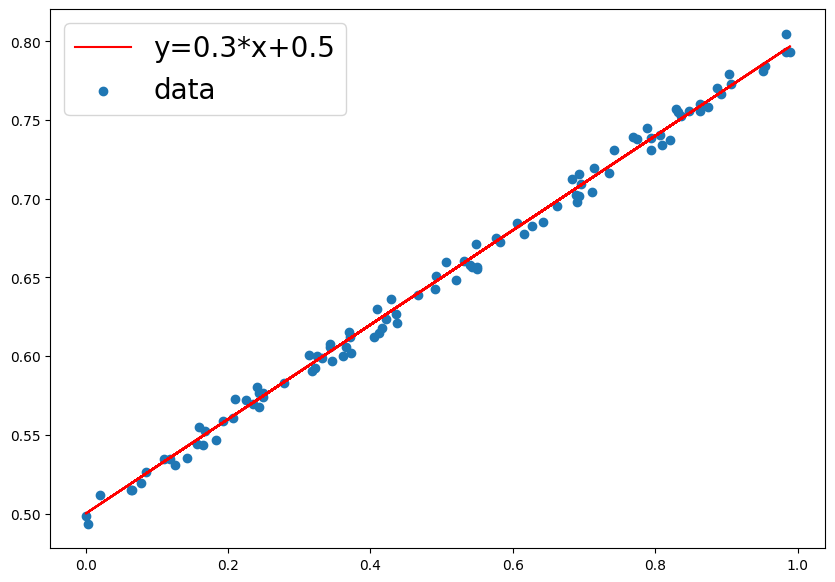

w:0.3, b:0.5


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# 샘플에 활용한 데이터셋 만들기
def make_linear(w=0.5, b=0.8, size=50, noise=1.0):
  x = np.random.rand(size)
  y = w * x + b
  noise = np.random.uniform(-abs(noise),abs(noise),size=y.shape)
  yy = y + noise
  plt.figure(figsize=(10,7))
  plt.plot(x, y, color='r', label=f'y={w}*x+{b}')
  plt.scatter(x, yy, label='data')
  plt.legend(fontsize=20)
  plt.show()
  print(f'w:{w}, b:{b}')
  return x, yy

x, y = make_linear(w=0.3, b=0.5, size=100, noise=0.01)

In [ ]:
# 최대 반복 횟수
num_epoch = 1000

# 학습률
learning_rate = 0.005

# 에러 기록
errors = []

# random한 값으로 w, b를 초기화
w = np.random.uniform(low=0.0, high=1.0)
b = np.random.uniform(low=0.0, high=1.0)

for epoch in range(num_epoch):
  # Hypothesis 정의
  y_hat = w * x + b

  # Loss Function 정의
  error = 0.5 * ((y_hat - y)**2).sum()
  if error < 0.005:
    break
  # Gradient 미분 계산
  w = w - learning_rate * ((y_hat - y)*x).sum()
  b = b - learning_rate * (y_hat - y).sum()

  errors.append(error)

  if epoch % 5 == 0:
    print('{0:2} w = {1:.5f}, b = {2:.5f} error = {3:.5f}'.format(epoch, w, b, error))

print('----' * 15)
print('{0:2} w = {1:.1f}, b = {2:.1f} error = {3:.5f}'.format(epoch, w, b, error))

 0 w = 0.72635, b = 0.58166 error = 35.20969
 5 w = 0.55745, b = 0.36457 error = 0.26803
10 w = 0.52067, b = 0.38204 error = 0.19703
15 w = 0.48979, b = 0.39842 error = 0.14580
20 w = 0.46328, b = 0.41250 error = 0.10799
25 w = 0.44050, b = 0.42459 error = 0.08010
30 w = 0.42094, b = 0.43498 error = 0.05951
35 w = 0.40413, b = 0.44391 error = 0.04432
40 w = 0.38970, b = 0.45157 error = 0.03312
45 w = 0.37730, b = 0.45815 error = 0.02485
50 w = 0.36664, b = 0.46381 error = 0.01875
55 w = 0.35749, b = 0.46867 error = 0.01424
60 w = 0.34963, b = 0.47284 error = 0.01092
65 w = 0.34288, b = 0.47643 error = 0.00847
70 w = 0.33708, b = 0.47951 error = 0.00666
75 w = 0.33210, b = 0.48215 error = 0.00533
------------------------------------------------------------
77 w = 0.3, b = 0.5 error = 0.00490


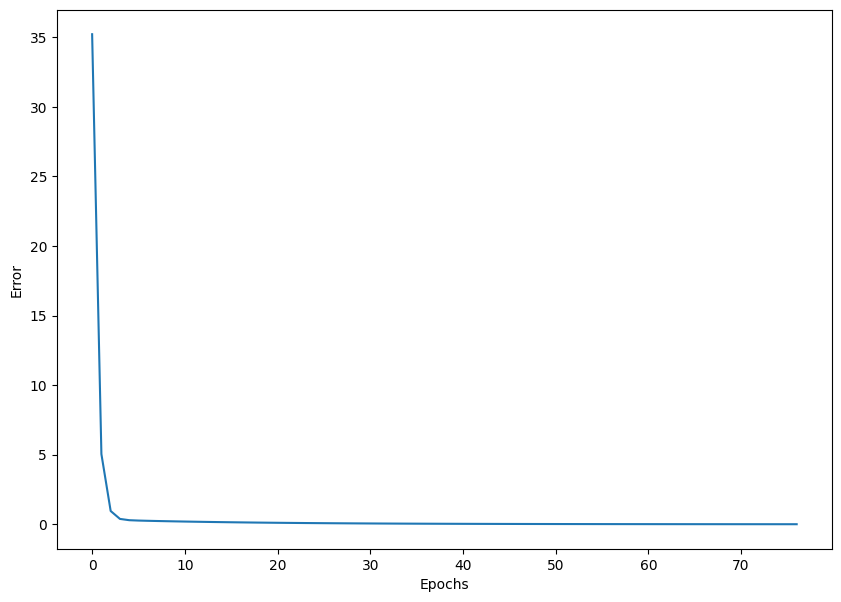

In [ ]:
plt.figure(figsize=(10,7))
plt.plot(errors)
plt.xlabel('Epochs')
plt.ylabel('Error')
plt.show()

* 종료 후 w, b 계수를 확인하면 샘플 데이터셋을 생성할 때 설정한 w, b 계수와 비슷한 값임을 확인할 수 있음

### 1-2 딥러닝 프로세스  
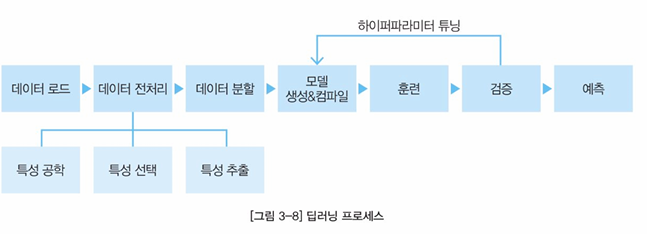

1-2-1 데이터 전처리 : 모델 주입 전 데이터 가공 단계  
1-2-2 모델 생성 : 모델의 구조를 정의하고 생성  
1-2-3 모델 컴파일 : 생성된 모델 훈련에 사용할 손실함수, 옵티마이저, 평가지표 등을 정의  
1-2-4 모델 훈련 : fit() 함수에 필요한 정보를 파라미터로 전달. epoch, 배치 크기, 콜백 등 지정  
1-2-5 모델 검증 : 검증 데이터셋과 비교하여 평가지표 계산  
1-2-6 모델 예측 : 예측 결과 반환

## 02. 단순 신경망 훈련
### 2-1 선형회귀
y = wx + b

### 2-2 뉴런(Neuron)
인공 신경망 모델을 구성하는 하나의 신경, 노드(node)라고도 불림  
여러 개의 레이어를 가지며 1개의 레이어는 1개 이상의 뉴런으로 구성됨

### 2-3 Dense 레이어
심층 신경망 모델을 구성하는 가장 기본 레이어  
텐서플로의 layer 모듈에 있는 Dense 로 쉽게 구현 가능  

In [ ]:
import tensorflow as tf

# 10개의 노드로 이루어진 Dense 레이어
tf.keras.layers.Dense(10)

# ReLU 활성화 함수 적용
tf.keras.layers.Dense(10, activation='relu')

### 2-4 데이터셋 만들기

In [ ]:
# 샘플 데이터셋 생성
x = np.arange(1,6)

# y = 3x + 2
y = 3 * x + 2
print(x)
print(y)

[1 2 3 4 5]
[ 5  8 11 14 17]


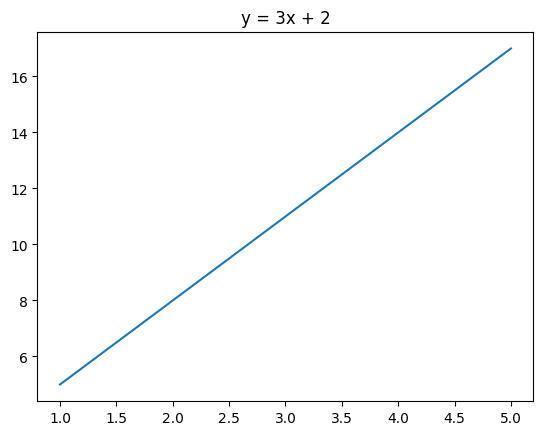

In [ ]:
import matplotlib.pyplot as plt

# 시각화
plt.plot(x,y)
plt.title('y = 3x + 2')
plt.show()

### 2-5 Sequential API
층을 이어 붙이듯 시퀀스에 맞게 일렬로 연결하는 방식
* 입력 레이어부터 출력 레이어까지 순서를 갖는다   
* 입력 레이어는 시퀀스의 가장 앞에 위치한 층에 투입되고 순서대로 각 층을 하나씩 통과하면서 딥러닝 연산을 수행한다  
* 다만 다중 입력이나 다중 출력을 갖는 복잡한 구조의 경우 Functional API를 사용해야 한다  



#### 2-5-1 모델 구조
1) 리스트형 정의 - Sequential 클래스 함수에 파이썬 리스트 형태로 여러개의 층을 입력

In [ ]:
import tensorflow as tf

# 리스트형
model = tf.keras.Sequential([
        tf.keras.layers.Dense(10),
        tf.keras.layers.Dense(5),
        tf.keras.layers.Dense(1),
])

2) add 함수 - Sequential 클래스 객체를 먼저 만든 뒤에, 생성된 모델 인스턴스에 층을 추가하는 방식

In [ ]:
# add 함수로 레이어 추가
model = tf.keras.Sequential()
model.add(tf.keras.layers.Dense(10))
model.add(tf.keras.layers.Dense(5))
model.add(tf.keras.layers.Dense(1))

#### 2-5-2 입력 데이터 형태
반드시 첫번째 층은 input_shape 매개변수를 지정해야 한다
* 데이터셋의 shape가 (150,4)라면 input_shape는 튜플 형태인 (4,) 혹은 리스트 형태인 [4]로 지정할 수 있다

In [ ]:
import tensorflow as tf
model = tf.keras.Sequential([
    # 입력 데이터의 shape=(150,4)인 경우 input_shape 지정
    tf.keras.layers.Dense(10, input_shape=[4]),
    tf.keras.layers.Dense(5),
    tf.keras.layers.Dense(1)
])

#### 2-5-3 단순선형회귀 모델 정의
단순선형회귀 모델을 만들기 위해서는 Dense 레이어 한 개를 사용  
* 1차 함수식 y = wx + b 에서 입력 데이터는 x 1개 이므로 input_shape = [1] 로 지정
* 출력 값은 y에 대한 모델의 예측값
* Dense 레이어는 use_bias = True가 기본 설정되어 상수항 b가 추가된다. use_bias = False로 지정하면 추가되지 않는다

In [ ]:
# 단순선형회귀 모델 생성
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

### 2-6 모델 요약
Sequantial API로 모델을 만들었다면 model.summary()로 모델의 요약 확인 가능  
* 모델의 구조를 확인할 수 있으며 층별 노드의 개수가 표기되고 하단에는 훈련 시 업데이트할 파라미터의 개수가 표기된다

In [ ]:
model.summary()

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_9 (Dense)             (None, 1)                 2         
                                                                 
Total params: 2 (8.00 Byte)
Trainable params: 2 (8.00 Byte)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


* Total params는 모델 내부에 존재하는 모든 파라미터의 합계, Trainable params는 모델 훈련 시 업데이트 할 파라미터의 합계, Non-trainable paramssms 업데이트하지 않을 파라미터의 합계
* 위 모델에서는 업데이트 파라미터가 w, b 2개

### 2-7 컴파일
모델의 훈련 과정에서 적용할 옵티마이저, 손실함수, 평가지표 등을 정의
* 클래스 인스턴스, 함수, 사전 정의된 문자열 -> 3가지 방법으로 지정할 수 있음
* 클래스 인스턴스 - 학습률, 모멘텀 등의 하이퍼파라미터를 사용자가 직접 지정할 수 있음
* 문자열로 지정 시 기본값으로 설정된 하이퍼파라미터를 사용하며 수정이 어려움  

기본 설정만으로도 딥러닝 모델의 성능은 잘 나오는 편이다. 일반적으로 많이 사용되는 검증된 기본값을 하이퍼 파라미터로 적용하기 때문이다

In [ ]:
# 긴 문자열 지정
model.compile(optimizer='sgd', loss='mean_squared_error',
              metrics=['mean_squared_error', 'mean_absolute_error'])

In [ ]:
# 짧은 문자열 지정
model.compile(optimizer='sgd', loss='mse', metrics=['mse','mae'])

In [ ]:
# 클래스 인스턴스 지정
model.compile(optimizer=tf.keras.optimizers.SGD(lr=0.005),
              loss=tf.keras.losses.MeanAbsoluteError(),
              metrics=[tf.keras.metrics.MeanAbsoluteError(),
                       tf.keras.metrics.MeanSquaredError()])

옵티마이저는 확률적 경사하강법 알고리즘인 'sgd', 손실함수로는 평균제곱오차(mse), 평가지표는 평균절대오차(mae)를 지정한다

In [ ]:
model.compile(optimizer='sgd', loss='mse', metrics=['mae'])

### 2-8 훈련
fit() 메소드를 적용하여 모델 훈련 = 가중치 텐서를 업데이트 하는 과정

In [ ]:
model.fit(x,y,epochs=5)

Epoch 1/5
1/1 [==============================] - 1s 973ms/step - loss: 261.4264 - mae: 14.9684
Epoch 2/5
1/1 [==============================] - 0s 12ms/step - loss: 152.3879 - mae: 11.4560
Epoch 3/5
1/1 [==============================] - 0s 13ms/step - loss: 88.8453 - mae: 8.7746
Epoch 4/5
1/1 [==============================] - 0s 11ms/step - loss: 51.8156 - mae: 6.7275
Epoch 5/5
1/1 [==============================] - 0s 11ms/step - loss: 30.2363 - mae: 5.1648


In [ ]:
# 단순 선형회귀 모델 생성
model = tf.keras.Sequential([
    tf.keras.layers.Dense(1, input_shape=[1])
])

# 컴파일
model.compile(optimizer='sgd', loss='mse', metrics='mae')

# 훈련
history = model.fit(x, y, epochs=1200)

Epoch 1/1200
1/1 [==============================] - 1s 589ms/step - loss: 61.7048 - mae: 7.4270
Epoch 2/1200
1/1 [==============================] - 0s 20ms/step - loss: 36.1033 - mae: 5.7245
Epoch 3/1200
1/1 [==============================] - 0s 21ms/step - loss: 21.1830 - mae: 4.4247
Epoch 4/1200
1/1 [==============================] - 0s 19ms/step - loss: 12.4873 - mae: 3.4322
Epoch 5/1200
1/1 [==============================] - 0s 20ms/step - loss: 7.4189 - mae: 2.6744
Epoch 6/1200
1/1 [==============================] - 0s 18ms/step - loss: 4.4643 - mae: 2.0958
Epoch 7/1200
1/1 [==============================] - 0s 16ms/step - loss: 2.7415 - mae: 1.6538
Epoch 8/1200
1/1 [==============================] - 0s 15ms/step - loss: 1.7367 - mae: 1.3163
Epoch 9/1200
1/1 [==============================] - 0s 16ms/step - loss: 1.1501 - mae: 1.0584
Epoch 10/1200
1/1 [==============================] - 0s 15ms/step - loss: 0.8074 - mae: 0.8614
Epoch 11/1200
1/1 [==============================] - 0

훈련에 대한 결과가 저장된 history 변수를 사용하여 epoch별 훈련 손실 및 평가지표를 시각화할 수 있다

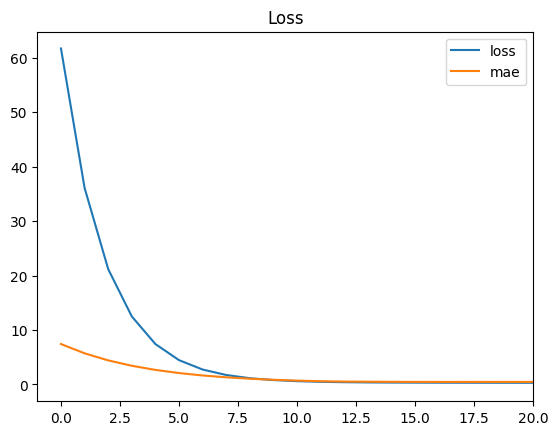

In [ ]:
import matplotlib.pyplot as plt

# 20 epoch 까지 Loss 수렴에 대한 시각화
plt.plot(history.history['loss'],label='loss')
plt.plot(history.history['mae'],label='mae')
plt.xlim(-1,20)
plt.title('Loss')
plt.legend()
plt.show()

### 2-9 검증
evaluate() 메소드로 모델의 성능을 검증할 수 있다

In [ ]:
model.evaluate(x,y)

1/1 [==============================] - 1s 586ms/step - loss: 1.0411e-04 - mae: 0.0088


[0.00010411059338366613, 0.00875778216868639]

### 2-10 예측
predict() 메소드로 모델의 예측값을 얻을 수 있다
* 1차식 y=3x+2 에 대입한 값인 32에 꽤 근사한 값을 예측한 것을 확인할 수 있다

In [ ]:
# x 인자에 해당하는 값으로 숫자 10을 입력
model.predict([10])

1/1 [==============================] - 1s 913ms/step


array([[32.042328]], dtype=float32)

## 03. 심층 신경망으로 이미지 분류
단층이 아닌 더 깊이 있는 딥러닝 모델을 생성한다
### 3-1 케라스 내장 데이터셋 로드


In [ ]:
import tensorflow as tf

# 케라스의 내장 데이터셋에서 mnist 데이터셋 로드
mnist = tf.keras.datasets.mnist

In [ ]:
# load_data()로 데이터셋 로드
(x_train, y_train) , (x_test, y_test) = mnist.load_data()

In [ ]:
# 로드된 데이터셋 확인
print('train set: ', x_train.shape, y_train.shape)
print('test  set: ', x_test.shape, y_test.shape)

train set:  (60000, 28, 28) (60000,)
test  set:  (10000, 28, 28) (10000,)


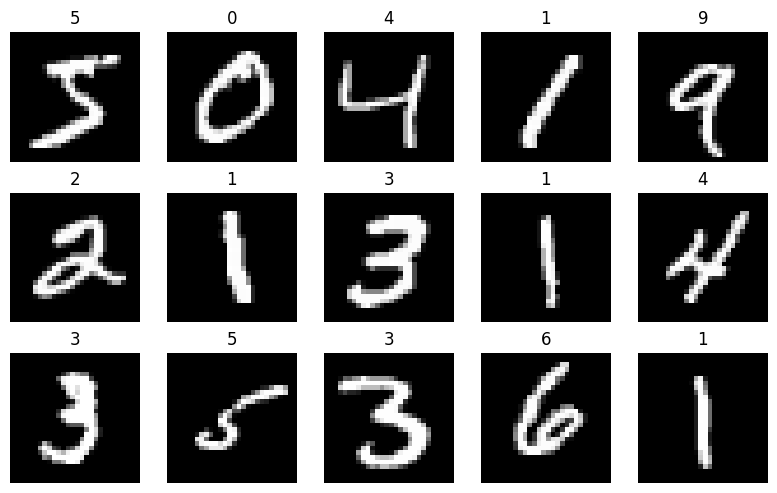

In [ ]:
# 데이터 시각화
import matplotlib.pyplot as plt

# canvas 생성
fig, axes = plt.subplots(3,5)
fig.set_size_inches(8,5)

for i in range(15):
  ax = axes[i//5, i%5]
  # imshow로 이미지 시각화
  ax.imshow(x_train[i], cmap='gray')
  ax.axis('off')
  ax.set_title(str(y_train[i]))

plt.tight_layout()
plt.show()

### 3-2 데이터 전처리
정규화를 통해 데이터의 범위 조절

In [ ]:
# x_train 배열의 데이터 확인
x_train[0, 10:15, 10:15]

array([[  1, 154, 253,  90,   0],
       [  0, 139, 253, 190,   2],
       [  0,  11, 190, 253,  70],
       [  0,   0,  35, 241, 225],
       [  0,   0,   0,  81, 240]], dtype=uint8)

* 0~1 사이의 값을 가지도록 정규화하기 위해서는 데이터의 최대값인 255로 나눈다

In [ ]:
# 픽셀 값의 최소/최대값 확인
print(f'정규화 전] 최소값: {x_train.min()}, 최대값: {x_train.max()}')

# 데이터 정규화
x_train = x_train / x_train.max()

# 정규화 후 최소/최대값 확인
print(f'정규화 후] 최소값: {x_train.min()}, 최대값: {x_train.max()}')

정규화 전] 최소값: 0, 최대값: 255
정규화 후] 최소값: 0.0, 최대값: 1.0


In [ ]:
# test 셋에도 정규화 동일 적용
x_test = x_test / x_test.max()

In [ ]:
# 변환 후 x_train 배열의 데이터 확인
x_train[0, 10:15, 10:15]

array([[0.00392157, 0.60392157, 0.99215686, 0.35294118, 0.        ],
       [0.        , 0.54509804, 0.99215686, 0.74509804, 0.00784314],
       [0.        , 0.04313725, 0.74509804, 0.99215686, 0.2745098 ],
       [0.        , 0.        , 0.1372549 , 0.94509804, 0.88235294],
       [0.        , 0.        , 0.        , 0.31764706, 0.94117647]])

### 3-3 Flatten 레이어
Dense 레이어에는 입력값으로 반드시 1차원 배열이 들어가야 한다

In [ ]:
# 2차원을 1차원으로 변경
print(f'변경 전 shape: {x_train.shape}')
print(f'1D으로 shape 변경 후: {x_train.reshape(60000,-1).shape}')

변경 전 shape: (60000, 28, 28)
1D으로 shape 변경 후: (60000, 784)


또는 케라스의 Flatten 레이어를 사용하면 다차원 데이터를 1차원으로 펼쳐주는 방법도 가능하다

In [ ]:
print(f'변경 전 shape: {x_train.shape}')

# Flatten 레이어 적용 후 shape 확인
print(f'Flatten 적용 후: {tf.keras.layers.Flatten()(x_train).shape}')

변경 전 shape: (60000, 28, 28)
Flatten 적용 후: (60000, 784)


### 3-4 활성화 함수
활성화 함수는 입력을 비선형 출력으로 변환해주는 함수
* 일반적으로 선형관계를 나타내는 함수에 비선형성을 추가하는 방법이다
* 시그모이드(Sigmoid), 하이퍼볼릭 탄젠트(Hyperbolic Tangent), ReLU(Rectified Unit) 등이 자주 사용된다

In [ ]:
# Dense 레이어에 relu 활성화 함수를 적용한 경우
tf.keras.layers.Dense(128, activation='relu')

다음과 같이 별도의 층처럼 적용할 수도 있다  
* 별도의 층으로 적용하는 경우는 Dense 레이어 다음에 배치 정규화를 적용한 후 활성화 함수를 적용하고자 할 때 많이 사용된다 (레이어 구성을 조금 더 커스터마이징하고 싶을 때)

In [ ]:
# Dense 레이어와 relu 활성화 한수 레이어를 별도 적용한 경우
model = tf.keras.Sequential([
    tf.keras.layers.Dense(128),
    tf.keras.layers.Activation('relu')
])

### 3-5 입력과 출력
이미지의 세로, 가로 형태를 나타내는 (28,28)을  input_shape로 지정한다  
가장 마지막 레이어는 출력층으로 반드시 분류해야 할 클래스 개수(10개)와 동일해야 한다

In [ ]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dense(64, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    # 노드 = 10개 (클래스 개수와 동일)
    tf.keras.layers.Dense(10, activation='softmax'),
])

출력층의 노드 개수가 2개 이상인 경우, 즉 다중 분류 문제에서는 softmax 활성화 함수를 사용해야 한다

In [ ]:
# 출력층 노드 = 1인 경우, sigmoid
tf.keras.layers.Dense(1, activation='sigmoid')

# 출력층 노드 = 2개 이상인 경우, softmax
tf.keras.layers.Dense(10, activation='softmax'),

(<keras.src.layers.core.dense.Dense at 0x7dd5d6d05870>,)

### 3-6 손실함수
모델의 출력층에 따라 올바른 손실함수를 설정해야만 모델이 정상적으로 훈련할 수 있다  
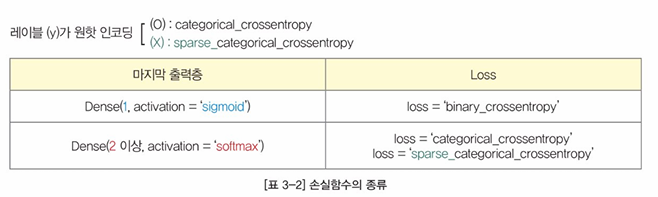

In [ ]:
# 이진 분류 (출력 노드 개수 = 1, sigmoid인 경우)
model.compile(loss='binary_crossentropy')

In [ ]:
# y가 원핫 벡터인 경우
# [0, 0, 0, 0, 0, 1, 0, 0]
model.compile(loss='categorical_crossentropy')

# y가 원핫 벡터가 아닌 경우
# [5]
model.compile(loss='sparse_categorical_crossentropy')

### 3-7 옵티마이저
손실을 낮추기 위해서, 신경망의 가중치와 학습률과 같은 신경망의 속성을 변경하는 데 사용되는 최적화 방법  
* 일반적으로 많이 사용되는 알고리즘은 Adam이며 대체로 좋은 성능을 발휘한다

In [ ]:
# 클래스 인스턴스로 지정
# 문자열이 아닌 파라미터로 직접 설정 가능
adam = tf.keras.optimizers.Adam(lr=0.01)
model.compile(optimizer=adam)

# 문자열로 지정
# 소문자로 표기
model.compile(optimizer='adam')

### 3-8 평가지표
accuracy가 가장 많이 사용된다

In [ ]:
# 클래스 인스턴스로 지정
acc = tf.keras.metrics.SparseCategoricalAccuracy()

model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['acc'])

In [ ]:
# 문자열로 지정
model.compile(optimizer='adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

### 3-9 훈련
검증 셋을 지정하는 방법은 validation_data 매개변수에 튜플 형식의 검증 셋을 지정해주면 된다

In [ ]:
# 훈련
model.fit(x_train, y_train,
          # 검증 셋 지정
          validation_data = (x_test, y_test),
          epochs=10)

Epoch 1/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.2319 - accuracy: 0.9312 - val_loss: 0.1253 - val_accuracy: 0.9613
Epoch 2/10
1875/1875 [==============================] - 12s 6ms/step - loss: 0.0929 - accuracy: 0.9712 - val_loss: 0.0999 - val_accuracy: 0.9677
Epoch 3/10
1875/1875 [==============================] - 13s 7ms/step - loss: 0.0667 - accuracy: 0.9792 - val_loss: 0.0952 - val_accuracy: 0.9734
Epoch 4/10
1875/1875 [==============================] - 16s 8ms/step - loss: 0.0490 - accuracy: 0.9843 - val_loss: 0.0827 - val_accuracy: 0.9777
Epoch 5/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0376 - accuracy: 0.9879 - val_loss: 0.0826 - val_accuracy: 0.9751
Epoch 6/10
1875/1875 [==============================] - 15s 8ms/step - loss: 0.0325 - accuracy: 0.9893 - val_loss: 0.0757 - val_accuracy: 0.9786
Epoch 7/10
1875/1875 [==============================] - 17s 9ms/step - loss: 0.0278 - accuracy: 0.9908 - val_loss: 0.0832 - val_ac

### 3-10 평가
evaluate() 메소드에 검증 셋을 전달하여 모델 성능을 검증한다

In [ ]:
# 검증
test_loss, test_acc = model.evaluate(x_test, y_test)

print('검증 셋 정확도:', test_acc)

313/313 [==============================] - 1s 3ms/step - loss: 0.0844 - accuracy: 0.9805
검증 셋 정확도: 0.9804999828338623


### 3-11 예측
predict() 메소드에 이미지 데이터를 넣어주면 예측 결과를 반환한다

In [ ]:
# 예측
predictions = model.predict(x_test)

313/313 [==============================] - 1s 2ms/step


In [ ]:
# 예측 결과 출력
predictions[0]

array([4.0828110e-09, 3.3613716e-08, 2.7311173e-09, 1.0704868e-08,
       4.3985429e-09, 2.6640453e-07, 3.4298349e-11, 9.9999660e-01,
       6.1119456e-09, 3.0090252e-06], dtype=float32)

마지막 출력층의 노드 개수가 10개로 지정되었기 때문에 10개의 개별 클래스에 대한 분류 확률값이 출력된다  
argmax를 활용하여 가장 높은 확률값을 가지는 클래스를 확인할 수 있다

In [ ]:
import numpy as np

# 0번 index에 대한 예측 클래스 출력
print(np.argmax(predictions[0]))

# 첫 10개 index에 대한 예측 클래스 출력
print(np.argmax(predictions[:10], axis=1))

7
[7 2 1 0 4 1 4 9 5 9]


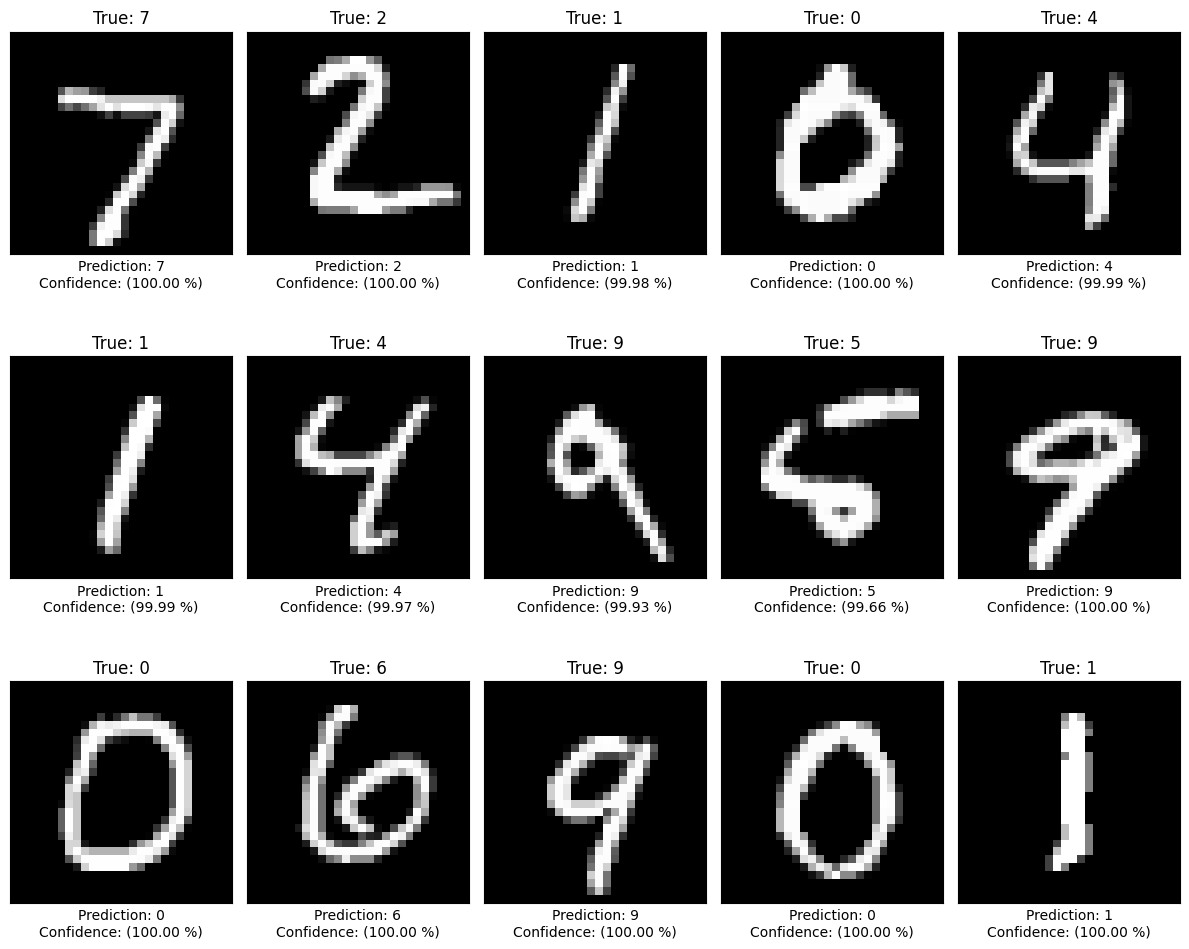

In [ ]:
# 데이터 시각화
import matplotlib.pyplot as plt
def get_one_result(idx):
  img, y_true, y_pred, confidence = x_test[idx], y_test[idx], np.argmax(predictions[idx]), 100*np.max(predictions[idx])
  return img, y_true, y_pred, confidence

# canvas 생성
fig, axes = plt.subplots(3,5)
fig.set_size_inches(12,10)
for i in range(15):
  ax = axes[i//5, i%5]
  img, y_true, y_pred, confidence = get_one_result(i)
  # imshow로 이미지 시각화
  ax.imshow(img, cmap='gray')
  ax.set_xticks([])
  ax.set_yticks([])
  ax.set_title(f'True: {y_true}')
  ax.set_xlabel(f'Prediction: {y_pred}\nConfidence: ({confidence:.2f} %)')
plt.tight_layout()
plt.show()